# ML_w10_cn

## Import

In [1]:
import math
import json
from timeit import default_timer as timer
import concurrent.futures as cf  # doesn't work with sklearn
import pandas as pd
import numpy as np
import copy as copy
import statistics as stt
import seaborn as sns
from os import system, getcwd, startfile
from os.path import join
from time import time
from scipy.io import arff
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter


## Data generation

In [2]:
def get2blobdata(show_graph=False, cmap='default'):
    size = 100
    np.random.seed(2000)
    X1 = np.random.normal(4.5, 1.3, size)
    Y1 = np.random.normal(2.0, 0.8, size) + X1
    X2 = X1 + np.random.normal(0.01, 0.3, size)
    Y2 = Y1 + 8.0

    X = np.append(X1, X2)
    Y = np.append(Y1, Y2)
    data = np.append(X,Y)
    data = np.reshape(data, newshape=(2, size*2)).transpose()

    y1 = [1 for i in range(size)]
    y2 = [0 for i in range(size)]
    y = np.append(y1, y2)

    %matplotlib inline
    if show_graph:
        if cmap == 'default':
            plt.scatter(data[:, 0], data[:, 1], c=y)
        elif cmap == 'rainbow':
            plt.scatter(data[:, 0], data[:, 1], c=y, cmap='rainbow')
        else:
            print('cmap not supported')
    
    return data, y

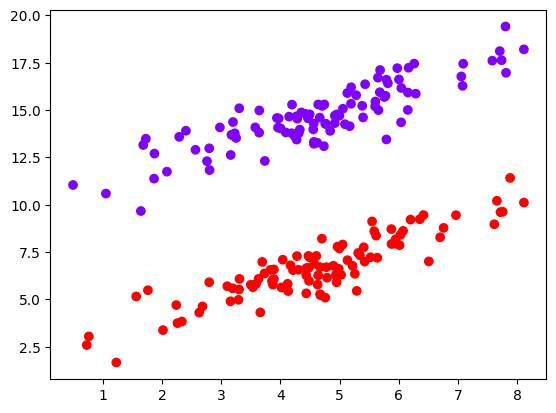

In [3]:
X, y = get2blobdata(show_graph=True, cmap='rainbow')

## Normalize data

In [4]:
ss = StandardScaler()
X = ss.fit_transform(X)

## Split training testing data

### Show dataset

In [5]:
def show_dataset(X=0, y=0, shape=False, type=False, data=False):
    if shape:
        print('X shape: ', X.shape)
        print('y shape: ', y.shape)
    if type:
        print('X type: ', X.dtype)
        print('y type: ', y.dtype)
    if data:
        print(X[0:6:2])
        print(y[0:6:2])


In [6]:
show_dataset(X=X, y=y, shape=True, type=True, data=True)

X shape:  (200, 2)
y shape:  (200,)
X type:  float64
y type:  int32
[[ 1.39529753 -0.43887293]
 [-1.8671059  -1.19717328]
 [ 0.4160479  -0.99745099]]
[1 1 1]


### Split dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=201)

## Build ML/DL model

In [8]:
DT = DecisionTreeClassifier()
DT_weighted = DecisionTreeClassifier(class_weight='balanced')
RF = RandomForestClassifier()
RF_weighted = RandomForestClassifier(class_weight='balanced')
KNN = KNeighborsClassifier()
KNN_weighted = KNeighborsClassifier(weights='distance')
SVM = SVC()
SVM_weighted = SVC(class_weight='balanced')
LR = LogisticRegression()
LR_weighted = LogisticRegression(class_weight='balanced')


## Training

In [9]:
DT_model = DT.fit(X, y)
DT_weighted_model = DT_weighted.fit(X, y)
RF_model = RF.fit(X, y)
RF_weighted_model = RF_weighted.fit(X, y)
KNN_model = KNN.fit(X, y)
KNN_weighted_model = KNN_weighted.fit(X, y)
SVM_model = SVM.fit(X, y)
SVM_weighted_model = SVM_weighted.fit(X, y)
LR_model = LR.fit(X, y)
LR_weighted_model = LR_weighted.fit(X, y)


## Testing

### predict

In [10]:
DT_pred = DT_model.predict(X)
DT_weighted_pred = DT_weighted_model.predict(X)
RF_pred = RF_model.predict(X)
RF_weighted_pred = RF_weighted_model.predict(X)
KNN_pred = KNN_model.predict(X)
KNN_weighted_pred = KNN_weighted_model.predict(X)
SVM_pred = SVM_model.predict(X)
SVM_weighted_pred = SVM_weighted_model.predict(X)
LR_pred = LR_model.predict(X)
LR_weighted_pred = LR_weighted_model.predict(X)


### show result

In [11]:
def result_analysis(y, y_pred, model_name, show=[False, False, False, False, False, False], rtd=[False, False, False, False, False, False]):
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    cr = classification_report(y, y_pred)
    
    if show[0]:
        print('model: ', model_name, end='|| ')
        print('accuracy: ', acc)
    if show[1]:
        print('model: ', model_name, end='|| ')
        print('precision: ', prec)
    if show[2]:
        print('model: ', model_name, end='|| ')
        print('recall: ', rec)
    if show[3]:
        print('model: ', model_name, end='|| ')
        print('f1: ', f1)
    if show[4]:
        print('model: ', model_name, end='|| ')
        print('confusion matrix: ', cm)
    if show[5]:
        print('model: ', model_name, end='|| ')
        print('classification report: ', cr)

    if rtd[0]:
        return acc
    if rtd[1]:
        return prec
    if rtd[2]:
        return rec
    if rtd[3]:
        return f1
    if rtd[4]:
        return cm
    if rtd[5]:
        return cr
        
    

In [12]:
result = []
result.append(result_analysis(y, DT_pred, 'DT', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, DT_weighted_pred, 'DT_weighted', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, RF_pred, 'RF', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, RF_weighted_pred, 'RF_weighted', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, KNN_pred, 'KNN', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, KNN_weighted_pred, 'KNN_weighted', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, SVM_pred, 'SVM', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, SVM_weighted_pred, 'SVM_weighted', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, LR_pred, 'LR', rtd=[True, False, False, False, False, False]))
result.append(result_analysis(y, LR_weighted_pred, 'LR_weighted', rtd=[True, False, False, False, False, False]))
print(result)

# result_analysis(y, DT_pred, 'Decision Tree', show=[True, False, False, False, False, False])
# result_analysis(y, DT_weighted_pred, 'Decision Tree Weighted', show=[True, False, False, False, False, False])
# result_analysis(y, RF_pred, 'Random Forest', show=[True, False, False, False, False, False])
# result_analysis(y, RF_weighted_pred, 'Random Forest Weighted', show=[True, False, False, False, False, False])
# result_analysis(y, KNN_pred, 'KNN', show=[True, False, False, False, False, False])
# result_analysis(y, KNN_weighted_pred, 'KNN Weighted', show=[True, False, False, False, False, False])
# result_analysis(y, SVM_pred, 'SVM', show=[True, False, False, False, False, False])
# result_analysis(y, SVM_weighted_pred, 'SVM Weighted', show=[True, False, False, False, False, False])
# result_analysis(y, LR_pred, 'Logistic Regression', show=[True, False, False, False, False, False])
# result_analysis(y, LR_weighted_pred, 'Logistic Regression Weighted', show=[True, False, False, False, False, False])


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Test Overfitting

If the accuracy of prediction of training data is high and prediction of testing data is low, it's likely overfitting.

In [13]:
def overfit_test(X_train, X_test, y_train, y_test, model_name, show=False, precision=4):
    if model_name == 'DT':
        model = DecisionTreeClassifier()
    elif model_name == 'DT_weighted':
        model = DecisionTreeClassifier(class_weight='balanced')
    elif model_name == 'RF':
        model = RandomForestClassifier()
    elif model_name == 'RF_weighted':
        model = RandomForestClassifier(class_weight='balanced')
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'KNN_weighted':
        model = KNeighborsClassifier(weights='distance')
    elif model_name == 'SVM':
        model = SVC()
    elif model_name == 'SVM_weighted':
        model = SVC(class_weight='balanced')
    elif model_name == 'LR':
        model = LogisticRegression()
    elif model_name == 'LR_weighted':
        model = LogisticRegression(class_weight='balanced')
    else:
        print('model name error')
        return
    train_model = model.fit(X_train, y_train)
    train_pred = train_model.predict(X_train)
    train_acc = round(accuracy_score(y_train, train_pred), precision)
    test_pred = train_model.predict(X_test)
    test_acc = round(accuracy_score(y_test, test_pred), precision)
    if show:
        print('model: ', model_name)
        print('train accuracy: ', train_acc)
        print('test accuracy: ', test_acc)
        print('acc diff: ', round(train_acc - test_acc, precision))
    return [model_name, train_acc, test_acc, round(train_acc - test_acc, precision)]



In [14]:
result = []
result.append(overfit_test(X_train, X_test, y_train, y_test, 'DT'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'DT_weighted'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'RF'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'RF_weighted'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'KNN'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'KNN_weighted'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'SVM'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'SVM_weighted'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'LR'))
result.append(overfit_test(X_train, X_test, y_train, y_test, 'LR_weighted'))
[print(i) for i in result]


['DT', 1.0, 0.96, 0.04]
['DT_weighted', 1.0, 0.98, 0.02]
['RF', 1.0, 1.0, 0.0]
['RF_weighted', 1.0, 1.0, 0.0]
['KNN', 1.0, 1.0, 0.0]
['KNN_weighted', 1.0, 1.0, 0.0]
['SVM', 1.0, 1.0, 0.0]
['SVM_weighted', 1.0, 1.0, 0.0]
['LR', 1.0, 1.0, 0.0]
['LR_weighted', 1.0, 1.0, 0.0]


[None, None, None, None, None, None, None, None, None, None]

## Details of DT and RF

### DT

[Text(0.5, 0.875, 'X[1] <= -0.065\ngini = 0.5\nsamples = 150\nvalue = [75.0, 75.0]'),
 Text(0.25, 0.625, 'X[1] <= -0.24\ngini = 0.028\nsamples = 79\nvalue = [1.056, 74.051]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 76\nvalue = [0.0, 72.152]'),
 Text(0.375, 0.375, 'X[0] <= 0.019\ngini = 0.459\nsamples = 3\nvalue = [1.056, 1.899]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1.056, 0.0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0.0, 1.899]'),
 Text(0.75, 0.625, 'X[0] <= 2.107\ngini = 0.025\nsamples = 71\nvalue = [73.944, 0.949]'),
 Text(0.625, 0.375, 'gini = 0.0\nsamples = 70\nvalue = [73.944, 0.0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 0.949]')]

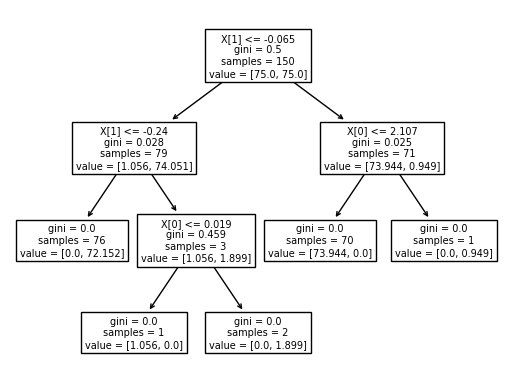

In [15]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)
tree.plot_tree(model)

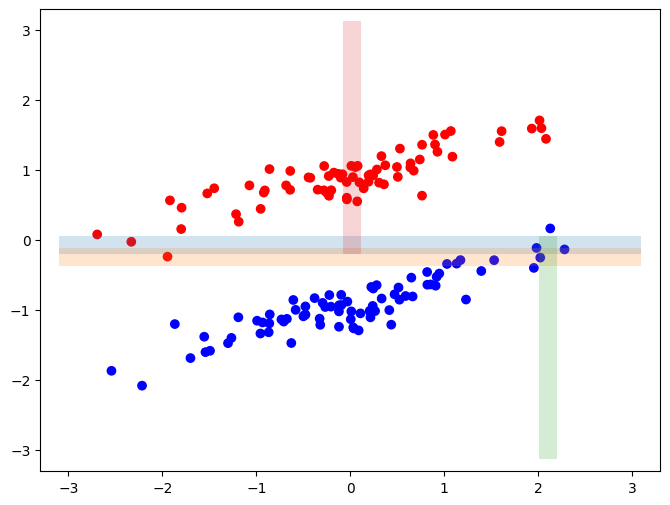

In [18]:
LINEWIDth = 13
dictColor = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'black', 5: 'purple', 6: 'orange', 7: 'pink', 8: 'brown', 9: 'gray'}
plt.figure(figsize=(8, 6))
data_temp = [dictColor[x] for x in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=data_temp)
# X[1]
plt.plot([-3, 3], [-0.065, -0.065], linewidth=LINEWIDth, alpha=0.2)
plt.plot([-3, 3], [-0.24, -0.24], linewidth=LINEWIDth, alpha=0.2)
# plt.plot([-3, 3], [-0.182, -0.182], linewidth=LINEWIDth, alpha=0.2)
# X[0]
plt.plot([2.107, 2.107], [-3, -0.065], linewidth=LINEWIDth, alpha=0.2)
plt.plot([0.019, 0.019], [-0.065, 3], linewidth=LINEWIDth, alpha=0.2)

### RF

[Text(0.5, 0.875, 'X[1] <= -0.258\ngini = 0.5\nsamples = 97\nvalue = [77.113, 73.101]'),
 Text(0.25, 0.625, 'X[1] <= -1.774\ngini = 0.0\nsamples = 49\nvalue = [0.0, 71.203]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0.0, 0.949]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 48\nvalue = [0.0, 70.253]'),
 Text(0.75, 0.625, 'X[1] <= 0.026\ngini = 0.047\nsamples = 48\nvalue = [77.113, 1.899]'),
 Text(0.625, 0.375, 'X[0] <= 0.019\ngini = 0.469\nsamples = 3\nvalue = [3.169, 1.899]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [3.169, 0.0]'),
 Text(0.75, 0.125, 'gini = -0.0\nsamples = 2\nvalue = [0.0, 1.899]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 45\nvalue = [73.944, 0.0]')]

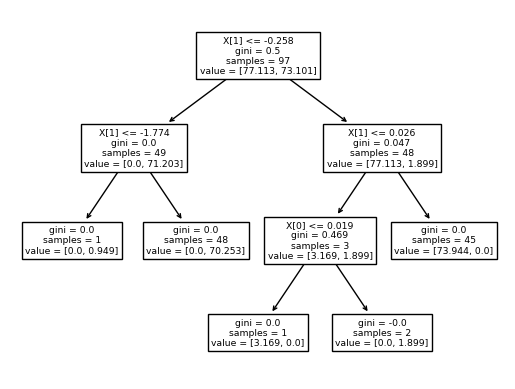

In [23]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
tree.plot_tree(model.estimators_[0])

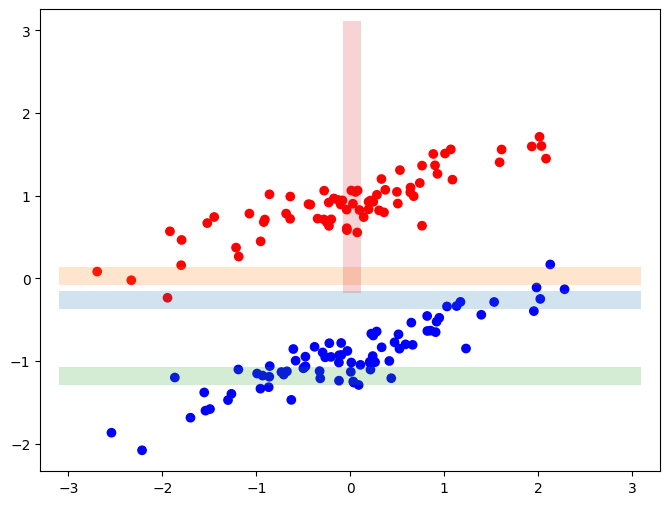

In [25]:
LINEWIDth = 13
dictColor = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'black',
             5: 'purple', 6: 'orange', 7: 'pink', 8: 'brown', 9: 'gray'}
plt.figure(figsize=(8, 6))
data_temp = [dictColor[x] for x in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c=data_temp)
# X[1]
plt.plot([-3, 3], [-0.258, -0.258], linewidth=LINEWIDth, alpha=0.2)
plt.plot([-3, 3], [0.026, 0.026], linewidth=LINEWIDth, alpha=0.2)
plt.plot([-3, 3], [-1.174, -1.174], linewidth=LINEWIDth, alpha=0.2)
# X[0]
# plt.plot([2.107, 2.107], [-3, -0.065], linewidth=LINEWIDth, alpha=0.2)
plt.plot([0.019, 0.019], [-0.065, 3], linewidth=LINEWIDth, alpha=0.2)
